In [43]:
from qiskit import *
import math
%matplotlib inline

In [44]:
qr = QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(1)

In [45]:
qc = QuantumCircuit(qr, crz, crx)

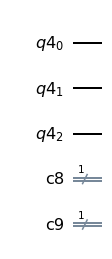

In [46]:
qc.draw(output = "mpl")

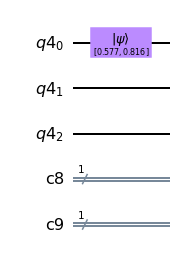

In [47]:
initial_state = [1/math.sqrt(3), math.sqrt(2/3)]   
qc.initialize(initial_state, 0)
qc.draw(output = "mpl")

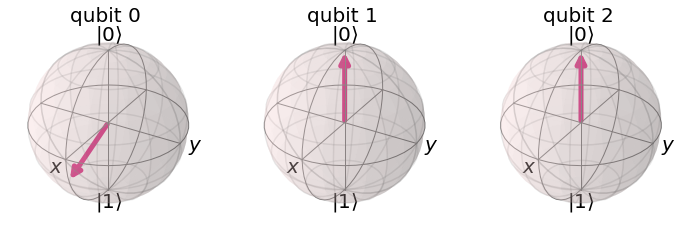

In [48]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
state = Statevector(qc)
plot_bloch_multivector(state)

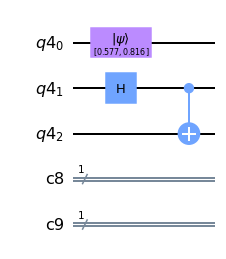

In [49]:
qc.h(1)
qc.cx(1, 2)
qc.draw(output = "mpl")

In [50]:
qc.barrier()

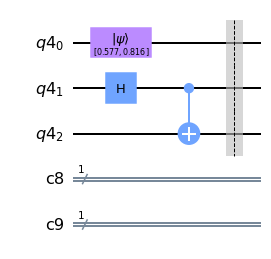

In [51]:
qc.draw(output = "mpl")

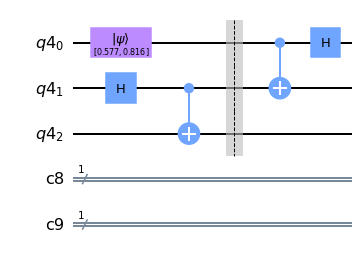

In [52]:
qc.cx(0, 1)
qc.h(0)
qc.draw(output = "mpl")

In [53]:
qc.barrier()

In [54]:
qc.measure(0, 0)
qc.measure(1, 1)

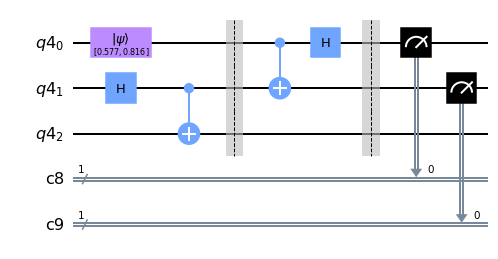

In [55]:
qc.draw(output = "mpl")

In [56]:
def decide(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)

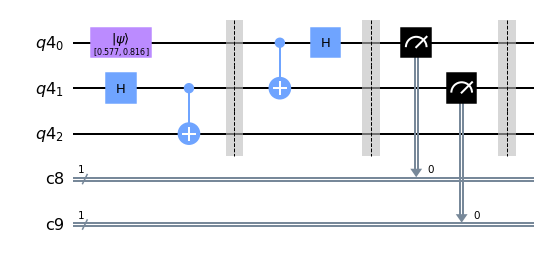

In [57]:
qc.barrier()
qc.draw(output = "mpl")

In [58]:
decide(qc, 2, crz, crx)

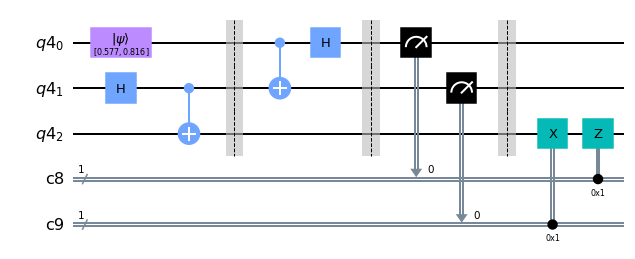

In [59]:
qc.draw(output = "mpl")

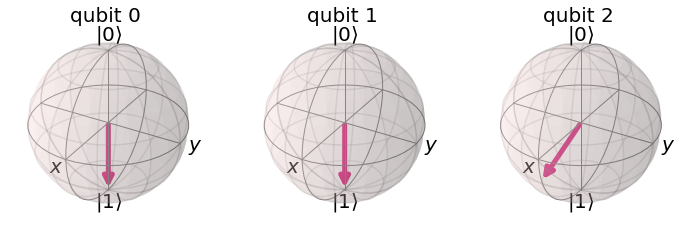

In [60]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)